<a href="https://colab.research.google.com/github/MahenJayawardana/DL-lab-02/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from keras.regularizers import l1, l2
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [4 6 3 0 7 8 4 7 5 0]


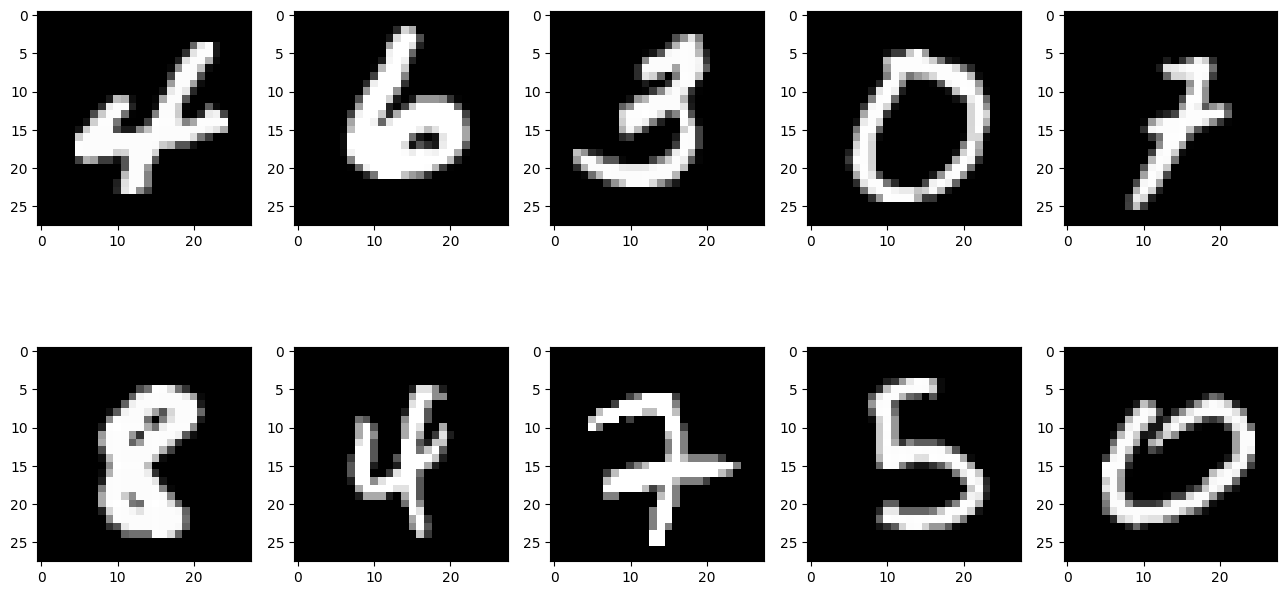

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [37]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(120,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(120,input_dim=120,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64,input_dim=120,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 120)               94200     
                                                                 
 dense_25 (Dense)            (None, 120)               14520     
                                                                 
 dense_26 (Dense)            (None, 64)                7744      
                                                                 
 dense_27 (Dense)            (None, 10)                650       
                                                                 
Total params: 117,114
Trainable params: 117,114
Non-trainable params: 0
_________________________________________________________________


Train the model

In [38]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8233 - accuracy: 0.8306
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.8264 - accuracy: 0.8825
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7651 - accuracy: 0.8947
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7279 - accuracy: 0.9028
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7086 - accuracy: 0.9061
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6902 - accuracy: 0.9097
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6830 - accuracy: 0.9114
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6781 - accuracy: 0.9133
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6654 - accuracy: 0.9155
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.66

Plot the loss and accuracy graphs

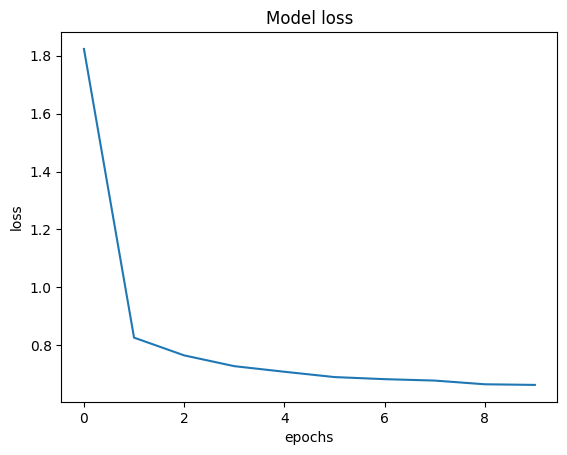

In [39]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

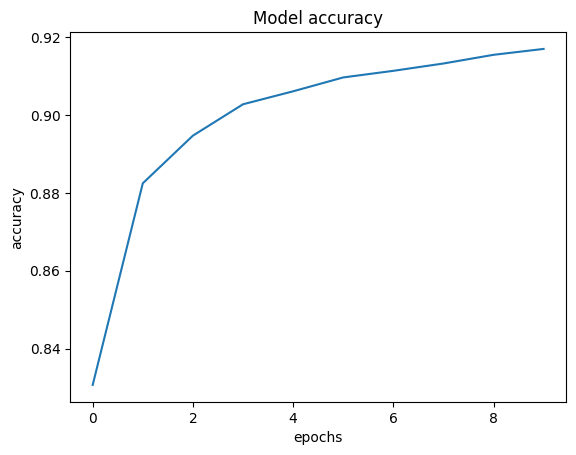

In [40]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [41]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.9157
Loss of the Test dataset is: 0.6676126718521118
Accuracy of the test dataset is: 0.9157000184059143


Save the model weights

In [42]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [62]:
new_test_data
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.9157
Loss of the Test dataset is: 0.6676126718521118
Accuracy of the test dataset is: 0.9157000184059143


In [63]:
new_test_data
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 4ms/step


In [64]:
conf_matrix = confusion_matrix(test_target, predicted_classes)

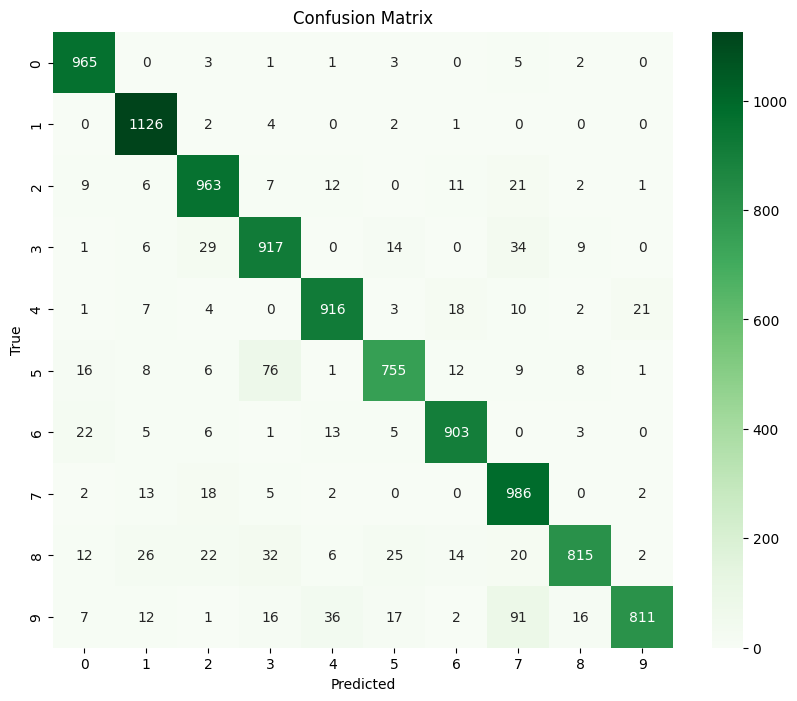

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()